# Notebook Content

In this notebook, we will explore and clean the [Homicide dataset](https://www.kaggle.com/murderaccountability/homicide-reports).

# Import Libraries

In [49]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px
import sqlite3 as sql
from sklearn.metrics import plot_confusion_matrix

# Read the Dataset

In [2]:
df = pd.read_csv('/Users/renadalbishri/Downloads/database.csv')
df

/Users/renadalbishri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


# Check Nulls

In [3]:
df.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

**There is no null values, but there is a lot of "Unknown" values in the dataset.**

# Modify Columns

In [4]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

## Replace Spaces with dashes 

In [5]:
df.columns=df.columns.str.replace(' ', '_')

In [6]:
df.columns

Index(['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime_Type', 'Crime_Solved',
       'Victim_Sex', 'Victim_Age', 'Victim_Race', 'Victim_Ethnicity',
       'Perpetrator_Sex', 'Perpetrator_Age', 'Perpetrator_Race',
       'Perpetrator_Ethnicity', 'Relationship', 'Weapon', 'Victim_Count',
       'Perpetrator_Count', 'Record_Source'],
      dtype='object')

## Rename Columns 

In [7]:
df.rename(columns= {'Victim_Sex' : 'Victim_Gender', 'Perpetrator_Sex': 'Perpetrator_Gender'}, inplace = True)

## Drop Unnecessary Columns 

In [8]:
df.drop(['Record_ID','City','Incident','Crime_Solved',
         'Agency_Name','Agency_Code','Month', 'Victim_Race', 'Perpetrator_Race',
         'Victim_Count', 'Perpetrator_Count', 'Victim_Ethnicity',
         'Record_Source','Perpetrator_Ethnicity'],axis=1,inplace=True)

In [9]:
df.shape

(638454, 10)

# Check and Delete dupplicates 

In [10]:
df.duplicated().sum()

90440

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548014 entries, 0 to 638453
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Agency_Type         548014 non-null  object
 1   State               548014 non-null  object
 2   Year                548014 non-null  int64 
 3   Crime_Type          548014 non-null  object
 4   Victim_Gender       548014 non-null  object
 5   Victim_Age          548014 non-null  int64 
 6   Perpetrator_Gender  548014 non-null  object
 7   Perpetrator_Age     548014 non-null  object
 8   Relationship        548014 non-null  object
 9   Weapon              548014 non-null  object
dtypes: int64(2), object(8)
memory usage: 46.0+ MB


# Change the Column Type 

In [14]:
df['Perpetrator_Age'] = pd.to_numeric(df['Perpetrator_Age'], errors='coerce')

In [15]:
df['Perpetrator_Age'] = df['Perpetrator_Age'].fillna(0)

In [16]:
df['Perpetrator_Age']= df['Perpetrator_Age'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548014 entries, 0 to 638453
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Agency_Type         548014 non-null  object
 1   State               548014 non-null  object
 2   Year                548014 non-null  int64 
 3   Crime_Type          548014 non-null  object
 4   Victim_Gender       548014 non-null  object
 5   Victim_Age          548014 non-null  int64 
 6   Perpetrator_Gender  548014 non-null  object
 7   Perpetrator_Age     548014 non-null  int64 
 8   Relationship        548014 non-null  object
 9   Weapon              548014 non-null  object
dtypes: int64(3), object(7)
memory usage: 46.0+ MB


# Delete Outliers

In [18]:
df.describe()

,Year,Victim_Age,Perpetrator_Age
count,548014.000000,548014.000000,548014.000000
mean,1995.622163,35.718980,23.136533
std,10.023980,40.373171,17.445348
min,1980.000000,0.000000,0.000000
25%,1987.000000,22.000000,0.000000
50%,1995.000000,31.000000,23.000000
75%,2004.000000,43.000000,34.000000
max,2014.000000,998.000000,99.000000


In [19]:
df=df[df.Perpetrator_Age >10]

In [20]:
df= df[df.Victim_Age < 90]

In [21]:
df= df[df.Perpetrator_Age < 90]

In [22]:
df.describe()

,Year,Victim_Age,Perpetrator_Age
count,404351.000000,404351.000000,404351.000000
mean,1995.478401,32.792148,30.923636
std,10.069215,16.471227,12.719877
min,1980.000000,0.000000,11.000000
25%,1987.000000,22.000000,21.000000
50%,1994.000000,30.000000,28.000000
75%,2004.000000,42.000000,37.000000
max,2014.000000,89.000000,89.000000


In [23]:
df

,Agency_Type,State,Year,Crime_Type,Victim_Gender,Victim_Age,Perpetrator_Gender,Perpetrator_Age,Relationship,Weapon
0,Municipal Police,Alaska,1980,Murder or Manslaughter,Male,14,Male,15,Acquaintance,Blunt Object
1,Municipal Police,Alaska,1980,Murder or Manslaughter,Male,43,Male,42,Acquaintance,Strangulation
5,Municipal Police,Alaska,1980,Murder or Manslaughter,Male,30,Male,36,Acquaintance,Rifle
6,Municipal Police,Alaska,1980,Murder or Manslaughter,Female,42,Male,27,Wife,Knife
9,Municipal Police,Alaska,1980,Murder or Manslaughter,Male,38,Male,40,Unknown,Firearm
...,...,...,...,...,...,...,...,...,...,...
638448,Municipal Police,Wyoming,2014,Murder or Manslaughter,Male,29,Male,67,Friend,Firearm
638450,Sheriff,Wyoming,2014,Murder or Manslaughter,Male,62,Male,57,Acquaintance,Handgun
638451,Municipal Police,Wyoming,2014,Murder or Manslaughter,Female,0,Female,22,Daughter,Suffocation
638452,Sheriff,Wyoming,2014,Murder or Manslaughter,Male,55,Male,31,Stranger,Knife


In [24]:
df= df[df.groupby('State').State.transform('count')>4000]

In [25]:
df

,Agency_Type,State,Year,Crime_Type,Victim_Gender,Victim_Age,Perpetrator_Gender,Perpetrator_Age,Relationship,Weapon
47,Sheriff,Alabama,1980,Murder or Manslaughter,Male,58,Male,43,Neighbor,Rifle
48,Sheriff,Alabama,1980,Murder or Manslaughter,Male,43,Female,38,Husband,Shotgun
49,Sheriff,Alabama,1980,Murder or Manslaughter,Male,26,Male,66,Acquaintance,Handgun
50,Sheriff,Alabama,1980,Murder or Manslaughter,Male,17,Male,40,Stranger,Handgun
51,Sheriff,Alabama,1980,Murder or Manslaughter,Male,24,Female,23,Husband,Handgun
...,...,...,...,...,...,...,...,...,...,...
638358,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,52,Female,51,Sister,Blunt Object
638359,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,23,Female,20,Acquaintance,Handgun
638361,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Male,24,Male,42,Stranger,Handgun
638362,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,24,Male,30,Girlfriend,Firearm


# Delete Unknown Value 

In [26]:
df['Victim_Gender'].value_counts()

Male       272421
Female      92635
Unknown        91
Name: Victim_Gender, dtype: int64

In [27]:
df= df[df.Victim_Gender != 'Unknown']

In [28]:
df['Perpetrator_Gender'].value_counts()

Male       322473
Female      42095
Unknown       488
Name: Perpetrator_Gender, dtype: int64

In [29]:
df= df[df.Perpetrator_Gender != 'Unknown']

In [30]:
df['Relationship'].value_counts()

Acquaintance            104168
Unknown                  69401
Stranger                 69041
Wife                     19655
Friend                   19017
Girlfriend               13993
Family                    8232
Son                       8062
Husband                   7782
Boyfriend                 6462
Daughter                  6063
Neighbor                  5328
Brother                   4739
Father                    3699
Mother                    3504
In-Law                    3211
Common-Law Wife           2233
Common-Law Husband        1817
Ex-Wife                   1678
Stepfather                1189
Boyfriend/Girlfriend      1128
Sister                    1026
Stepson                   1019
Stepdaughter               646
Ex-Husband                 546
Employer                   436
Employee                   314
Stepmother                 179
Name: Relationship, dtype: int64

In [31]:
df= df[df.Relationship != 'Unknown']

In [32]:
df['Weapon'].value_counts()

Handgun          140275
Knife             54212
Blunt Object      34819
Shotgun           19759
Rifle             14211
Unknown           10538
Firearm           10362
Strangulation      3271
Fire               2720
Suffocation        2098
Drugs               924
Drowning            761
Gun                 632
Poison              267
Explosives          217
Fall                101
Name: Weapon, dtype: int64

In [33]:
df= df[df.Weapon != 'Unknown']

In [34]:
df

,Agency_Type,State,Year,Crime_Type,Victim_Gender,Victim_Age,Perpetrator_Gender,Perpetrator_Age,Relationship,Weapon
47,Sheriff,Alabama,1980,Murder or Manslaughter,Male,58,Male,43,Neighbor,Rifle
48,Sheriff,Alabama,1980,Murder or Manslaughter,Male,43,Female,38,Husband,Shotgun
49,Sheriff,Alabama,1980,Murder or Manslaughter,Male,26,Male,66,Acquaintance,Handgun
50,Sheriff,Alabama,1980,Murder or Manslaughter,Male,17,Male,40,Stranger,Handgun
51,Sheriff,Alabama,1980,Murder or Manslaughter,Male,24,Female,23,Husband,Handgun
...,...,...,...,...,...,...,...,...,...,...
638358,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,52,Female,51,Sister,Blunt Object
638359,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,23,Female,20,Acquaintance,Handgun
638361,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Male,24,Male,42,Stranger,Handgun
638362,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,24,Male,30,Girlfriend,Firearm


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284629 entries, 47 to 638365
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Agency_Type         284629 non-null  object
 1   State               284629 non-null  object
 2   Year                284629 non-null  int64 
 3   Crime_Type          284629 non-null  object
 4   Victim_Gender       284629 non-null  object
 5   Victim_Age          284629 non-null  int64 
 6   Perpetrator_Gender  284629 non-null  object
 7   Perpetrator_Age     284629 non-null  int64 
 8   Relationship        284629 non-null  object
 9   Weapon              284629 non-null  object
dtypes: int64(3), object(7)
memory usage: 23.9+ MB


# Classify Relationship Method

In [36]:
def classify_Relationship(Relationship):
    """
    This method is called to classify the victim's relationship into one of three categories, either kinship or 
    acquaintance, or stranger based on relationship value.
    """
    if ((Relationship == 'Wife') | (Relationship == 'Son') |  (Relationship == 'Family') |  (Relationship == 'Husband') |
     (Relationship == 'Daughter') |  (Relationship == 'Brother') |  (Relationship == 'Father') |  (Relationship == 'Mother') |
         (Relationship == 'Sister') |  (Relationship == 'Stepmother') |  (Relationship == 'Stepfather') |  (Relationship == 'Stepson') |
             (Relationship == 'Stepdaughter') |  (Relationship == 'Common-Law Wife') |  (Relationship == 'Common-Law Husband')
           |  (Relationship == 'Friend') | (Relationship == 'Boyfriend/Girlfriend') | (Relationship == 'Boyfriend')
        | (Relationship == 'Girlfriend') | (Relationship == 'Neighbor') | (Relationship == 'Ex-Wife')
        | (Relationship == 'Ex-Husband') | (Relationship == 'Employer') | (Relationship == 'Employee') 
        | (Relationship == 'In-Law')):
        return 'kinship'
    elif Relationship == 'Stranger':
        return 'Strangers'
    else:
        return 'Acquaintance'
    

In [37]:
# call the method.
df['Relationship_classify']= df.Relationship.apply(classify_Relationship)

In [38]:
df

,Agency_Type,State,Year,Crime_Type,Victim_Gender,Victim_Age,Perpetrator_Gender,Perpetrator_Age,Relationship,Weapon,Relationship_classify
47,Sheriff,Alabama,1980,Murder or Manslaughter,Male,58,Male,43,Neighbor,Rifle,kinship
48,Sheriff,Alabama,1980,Murder or Manslaughter,Male,43,Female,38,Husband,Shotgun,kinship
49,Sheriff,Alabama,1980,Murder or Manslaughter,Male,26,Male,66,Acquaintance,Handgun,Acquaintance
50,Sheriff,Alabama,1980,Murder or Manslaughter,Male,17,Male,40,Stranger,Handgun,Strangers
51,Sheriff,Alabama,1980,Murder or Manslaughter,Male,24,Female,23,Husband,Handgun,kinship
...,...,...,...,...,...,...,...,...,...,...,...
638358,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,52,Female,51,Sister,Blunt Object,kinship
638359,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,23,Female,20,Acquaintance,Handgun,Acquaintance
638361,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Male,24,Male,42,Stranger,Handgun,Strangers
638362,Municipal Police,Wisconsin,2014,Murder or Manslaughter,Female,24,Male,30,Girlfriend,Firearm,kinship


# Graphs 

In [47]:
# Ratio count of the values in each kind of relationship
relationship = df['Relationship_classify'].value_counts()

fig = px.bar(relationship,
            text=(relationship/len(df['Relationship_classify'])*100),
            title='Relationship Classification Count ',
            orientation='h',
             height=500,
            width=1050)
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Relationship Type')
fig.update_traces(textposition='outside',texttemplate='%{text:.3s}%', 
                  marker=dict(color='#fbc010', colorscale='tealrose'))
fig.show()
fig.write_image("Relationship Classification bar.png")

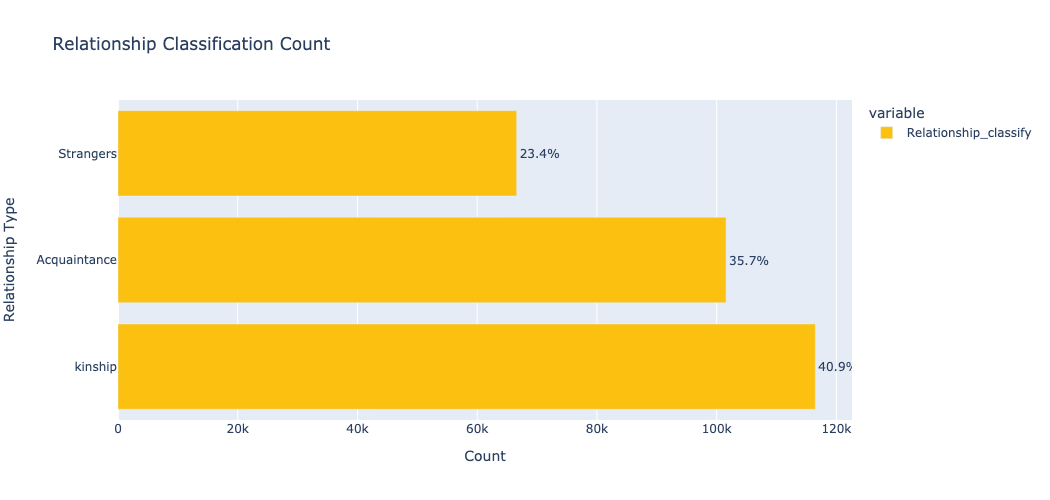

**As we see, the __kinship__ category has the highest values in the dataset, but in general it's considered as balanced data**

In [51]:
# Ratio count of the values in each kind of weapon used.
weapon = df.Weapon.value_counts()
fig = px.bar(x=weapon.index,
            y=weapon,
            text=(weapon/len(df['Weapon'])*100),
            title='Weapon Used In Homicides')
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Weapon Used')
fig.update_traces(textposition='outside',texttemplate='%{text:.3s}%', marker=dict(color=weapon, colorscale='tealrose'))
fig.show()
fig.write_image("Weapon Used bar.png")

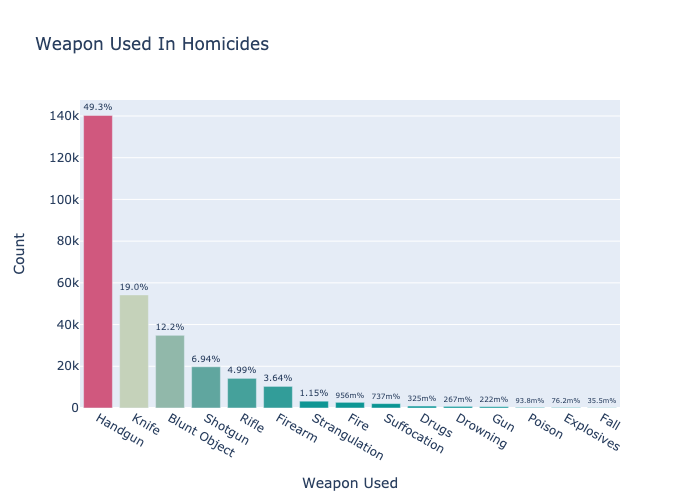

**As shown above, the __Handgun__ has the highest values as a weapon used in crimes with obvious difference.** 

In [41]:
# count each agency type  
agency_type = df['Agency_Type'].value_counts()

fig = px.pie(names=agency_type.index,
            values =agency_type,
            height=500,
            title='Agency Type')

fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Pastel2))
fig.show()
fig.write_image("Agency Type pie.png")

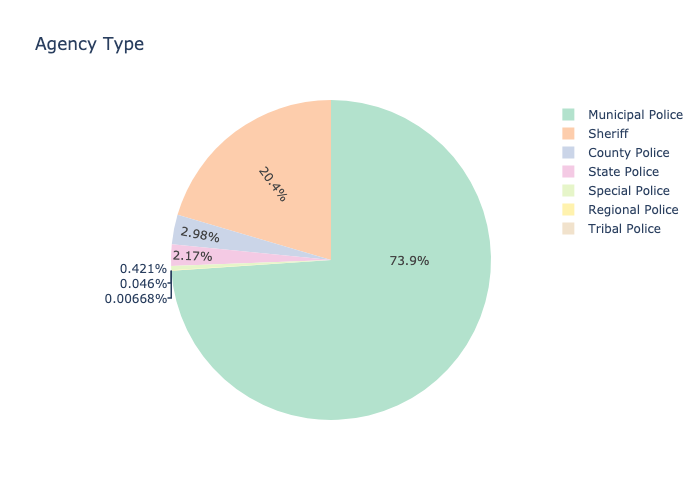

**As we see, the Municipal Police has the largest value as the agency type in crimes** 

# Store Data in Database 

In [43]:
conn = sql.connect('Crime_df.db')

In [44]:
df.to_sql('Crime_df', conn)